#Projekt 1
##1. Napisz program, uczący się gry “papier, kamień, nożyce”. Jako algorytm uczący zastosuj łańcuch Markowa z macierzą przejść pomiędzy trzema stanami (Papier, Kamień, Nożyce). Nauka gry polega na korekcie macierzy przejść (prawdopodobieństwa warunkowe zmiany stanu),
##2. Wartość wypłaty: 1 w przypadku wygranej, −1 w przypadku przegranej i 0 w przypadku remisu,
##3. Przeprowadź ciąg kilkudziesięciu gier “kamień, papier, nożyce”. Sporząź wykres jak zmienia się stan kasy w każdym kroku gry.

In [1]:
#import numpy as np
print("Ala ma ")
np.random.choice(['kota','papugę','psa'], p=[0.1,0.1,0.8])
# tutaj total sum of p = 1 (tam gdzie największe, to tam będzie losowało najczęściej )



Ala ma 


'psa'

In [ ]:
np.random.choice(['jeden','dwa','trzy'], p=[1/3,1/3,1/3])

#jeśli nie wiemy jaka będzie strzał to szansa na pojedyńcze = 1 / liczba możliwości  
#idelanie nie będzie jednak ,bo zwykle nie grają w to maszyny , czyli trzeba zwracać uwagę na rzeczy typu (szybciej się ręka na papier otwiera, albo modyfikacja P aby baitować przeciwnika?)
#nauka gry w takim razie powinna polegać na korekcie prawdopodobieństw
#ma ,,grać z nami''
#


'dwa'

In [2]:
# papier, kamien , nozyce
#[co ostatnio zagrał][co powinien zagrac]



def  get_row (guess):
  guess = str.lower(guess)
  g = -1
  if (guess == 'p'):
    g = 0
  
  if (guess == 'k'):
    g = 1
  
  if (guess == 'n'):
    g = 2
  
  return g

alpha = 0.6

def adjust (last_guess):
  new_arr = [[  1/3 , 1/3 , 1/3 ], [  1/3 , 1/3 , 1/3 ], [  1/3 , 1/3 , 1/3 ]]

  should = get_row(last_guess)
  should -= 1
  if should < 0 :
    should = 2
  
  new_arr[get_row(last_guess)][should]+= alpha
  return new_arr


def guess (array, last_guess=None):
  
  if last_guess == None : 
    ret = np.random.choice(['p','k','n'], p=[1/3,1/3,1/3])

  else :
    last = get_row(last_guess)
    ret = np.random.choice(['p','k','n'], p=array[last])

  return ret

def cal_score (pc_guess , hum_guess):
  score_arr = [ [0,1 ,-1] , 
                [-1 ,0 , 1] , 
                [1 ,-1 ,0] ]
  pc = get_row(pc_guess)
  hum = get_row(hum_guess)
  return score_arr[pc][hum]




Curr p :
[[0.3333333333333333, 0.3333333333333333, 0.3333333333333333], [0.3333333333333333, 0.3333333333333333, 0.3333333333333333], [0.3333333333333333, 0.3333333333333333, 0.3333333333333333]]

Give guess : 
k
Pc guess n
YOU WIN
Curr p :
[[0.3333333333333333, 0.3333333333333333, 0.3333333333333333], [0.9333333333333333, 0.3333333333333333, 0.3333333333333333], [0.3333333333333333, 0.3333333333333333, 0.3333333333333333]]

Give guess : 
k
Pc guess p
PC WIN
Games result :
[-1, 0]


<Axes: >

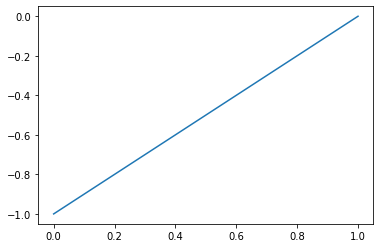

In [6]:
import seaborn as sns
import pandas as pd 
score = []
curr_score = 0
p = [[  1/3 , 1/3 , 1/3 ], [  1/3 , 1/3 , 1/3 ], [  1/3 , 1/3 , 1/3 ]]

games_amount = 2

while (games_amount > 0):
  print ("Curr p :")
  print (p)
  print("\nGive guess : ")
  hum_in = input()
  pc_in = guess(p)
  res = cal_score(pc_in,hum_in)

  print("Pc guess " + pc_in)

  if (res == 1) :
    print ("PC WIN")
  elif (res == 0 ): 
    print ("Draw")
  else:
    print ("YOU WIN")
  curr_score += res
  score.append(curr_score)

  p = adjust(hum_in)

  games_amount -= 1

print("Games result :")
print(score)




sns.lineplot(data = score)